# **Advanced machine learning for data science 2 - Project**

## <font color="red"> **Submission 1 - Anomaly Detection** </font>

### <font color="darksalmon"> Group 1 : Maxime Bisiaux - Vincent Fernandez - Audrey Laborde - Weilun Lin - Charlotte Padovani - Jie Su </font>

### <font color="pink4"> Import the dataset </font>

<i> Link of the dataset : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data </i>

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
# Import the dataset
df = pd.read_csv("Breast_cancer_data.csv")

In [ ]:
# Display the first five rows
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### <font color="pink4"> Data preparation - Cleaning step </font>

In [ ]:
# Remove "id" column
df = df.drop(["id"], axis=1)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

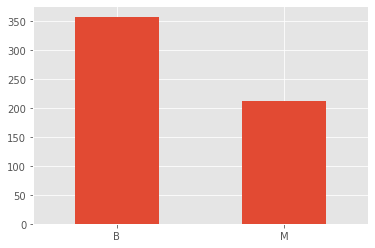

In [ ]:
# Data visualization : distribution of the variable "diagnosis"
ax = df['diagnosis'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)

In [ ]:
# Distribution of the variable "diagnosis"
print(df.diagnosis.value_counts().rename(index = {'B':'Begnin :', 'M':'Malignant :'}))

print(f"\nProportion of B in the dataset : {round(df.diagnosis.value_counts(1)[0]*100, 1)}%")
print(f"Proportion of M in the dataset : {round(df.diagnosis.value_counts(1)[1]*100, 1)}%")

# Comments :
# The distribution of the variable "diagnosis" between B ("begnin") and M ("malignant") is not unbalanced
# Therefore, in the outlier detection analysis, it is likely that many outliers will be detected

Begnin :       357
Malignant :    212
Name: diagnosis, dtype: int64

Proportion of B in the dataset : 62.7%
Proportion of M in the dataset : 37.3%


In [ ]:
# Display the correlation between quantitative variable (correlation matrix)
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,nan
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,nan
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,nan
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,nan
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,nan
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,nan
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,nan
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,nan
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,nan
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,nan


In [ ]:
# Remove NaN column (column with only missing values)
df = df.drop(df.columns[-1], axis=1)

In [ ]:
# Replace "Begnin" (B) by 0 and "Malignant" (M) by 1
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [ ]:
# Display a random sample of our data frame "df"
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
293,0,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,0.1875,...,13.06,25.75,84.35,517.8,0.1369,0.1758,0.1316,0.09140,0.3101,0.07007
515,0,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783
411,0,11.040,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881
255,1,13.960,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
341,0,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,...,10.75,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.08120,0.2982,0.09825


### <font color="pink4"> Anomaly detection - Model </font>

In [ ]:
feature = df[['radius_mean', 'fractal_dimension_worst']]
X = np.array(feature)
y = np.array(df["diagnosis"])

In [ ]:
# Divide the data into two parts : train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Standardization of features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Estimate dataframe variables passed through this function
def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

In [ ]:
# Calculate probability for each row of the dataset
def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [ ]:
# Use cross validation dataset to get optimal values of epsilon
# We calculate f1 for each prediction and select epsilon value for f1 is the best

def select_threshold(probs, test_data):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs), max(probs), stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(test_data, predictions, average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon

    return best_f1, best_epsilon


# Calculate the value of probabilities for each row in training data
mu, sigma = estimate_gaussian(X_train)
p = multivariate_gaussian(X_train, mu, sigma)

In [ ]:
# Selecting optimal value of epsilon using cross validation
p_cv = multivariate_gaussian(X_test, mu, sigma)

In [ ]:
# fscore and epsilon
fscore, ep = select_threshold(p_cv, Y_test)
print(fscore, ep)

0.6176470588235294 0.05216998426187139


In [ ]:
# Selecting outlier data points
outliers = np.asarray(np.where(p < ep))

### <font color="pink4"> Anomaly detection - Data visualization </font>

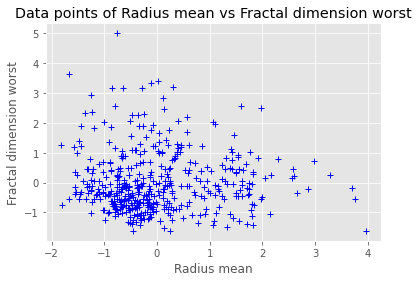

In [ ]:
# Scatter plot
plt.figure(1)
plt.xlabel('Radius mean')
plt.ylabel('Fractal dimension worst')
plt.title('Data points of Radius mean vs Fractal dimension worst')
plt.plot(X_train[:, 0], X_train[:, 1], 'b+')
plt.show()

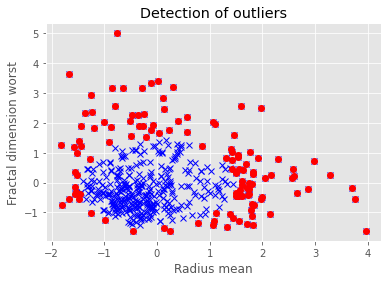

In [ ]:
# Scatter plot with the identification of the outliers
plt.figure(2)
plt.xlabel('Radius mean')
plt.ylabel('Fractal dimension worst')
plt.title('Detection of outliers')
plt.plot(X_train[:, 0], X_train[:, 1], 'bx')
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro')
plt.show()